In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_data=pd.read_csv('heart_2020_cleaned.csv')

In [3]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
#heart_data.Sex[heart_data.Sex == 'Male'] = 1
#heart_data.Sex[heart_data.Sex == 'Female'] = 0

In [5]:
heart_data.HeartDisease[heart_data.HeartDisease == 'No'] = 0
heart_data.HeartDisease[heart_data.HeartDisease == 'Yes'] = 1

In [6]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

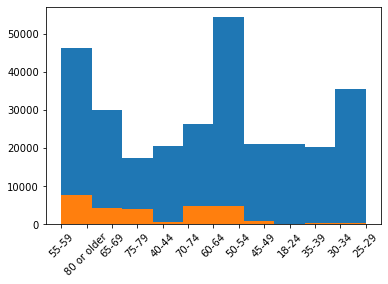

In [7]:
for name, group in heart_data.groupby('HeartDisease'):
    plt.hist(group['AgeCategory'], label=name)
plt.xticks(rotation = 45)

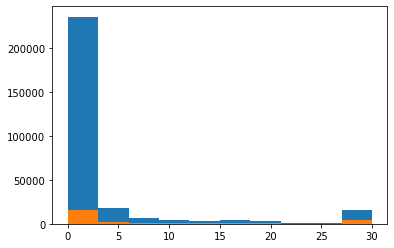

In [8]:
for name, group in heart_data.groupby('HeartDisease'):
    plt.hist(group['PhysicalHealth'], label=name)

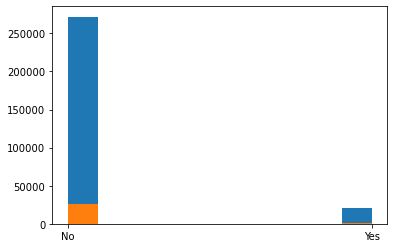

In [9]:
for name, group in heart_data.groupby('HeartDisease'):
    plt.hist(group['AlcoholDrinking'], label=name)

(array([16196.,  2233.,   758.,   884.,   426.,   972.,   683.,   126.,
          281.,  4814.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

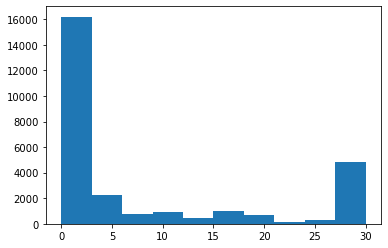

In [10]:
hdisease = heart_data[heart_data['HeartDisease'] == 1]
plt.hist(hdisease['PhysicalHealth'])

(array([26232.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1141.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

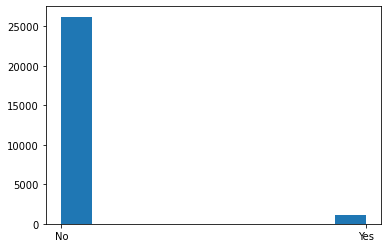

In [11]:
plt.hist(hdisease['AlcoholDrinking'])

In [90]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [171]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

newdf=heart_data.copy()

In [172]:
newdf.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [173]:
#identify categorical values to transform
cat_columns=['Smoking','AlcoholDrinking','Stroke','Sex','Race','DiffWalking','PhysicalActivity','AgeCategory', 'GenHealth','Diabetic', 'Asthma', 'KidneyDisease','SkinCancer']
#change these to object types
newdf[cat_columns]=newdf[cat_columns].astype(object)

In [174]:

#create labelencoder instance
labelencoder = LabelEncoder()

#apply encoder to categorical columns
for x in cat_columns:
    newdf[x] = labelencoder.fit_transform(newdf[x])
                     
newdf.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [175]:
#create numerical values dataframe
num_features=['BMI','PhysicalHealth','MentalHealth', 'SleepTime']

newdf[num_features]=newdf[num_features].astype(int)

from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
newdf[num_features]= trans.fit_transform(newdf[num_features])

newdf.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.571429,1,0,0,1.5,10.0,0,0,7,5,2,1,4,-1.0,1,0,1
1,0,-1.000000,0,0,1,0.0,0.0,0,0,12,5,0,1,4,0.0,0,0,0
2,0,-0.142857,1,0,0,10.0,10.0,0,1,9,5,2,1,1,0.5,1,0,0
3,0,-0.428571,0,0,0,0.0,0.0,0,0,11,5,0,0,2,-0.5,0,0,1
4,0,-0.571429,0,0,0,14.0,0.0,1,0,4,5,0,1,4,0.5,0,0,0


In [176]:
#'Asthma','KidneyDisease', 'SkinCancer','DiffWalking','Stroke'
#Trying out different columns to drop and seeing how accuracy is affected

newdf=newdf.drop(['KidneyDisease','Stroke', 'SkinCancer', 'Asthma', 'DiffWalking'], axis=1)

In [177]:
newdf.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime
0,0,-1.571429,1,0,1.5,10.0,0,7,5,2,1,4,-1.0
1,0,-1.000000,0,0,0.0,0.0,0,12,5,0,1,4,0.0
2,0,-0.142857,1,0,10.0,10.0,1,9,5,2,1,1,0.5
3,0,-0.428571,0,0,0.0,0.0,0,11,5,0,0,2,-0.5
4,0,-0.571429,0,0,14.0,0.0,0,4,5,0,1,4,0.5


In [178]:
x=newdf.drop(['HeartDisease'],axis=1)
y=newdf['HeartDisease']

In [179]:
y=y.astype('int')

In [180]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import statsmodels.api as sm


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [181]:
#fitting and scoring the logistic model

model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9130176466296293

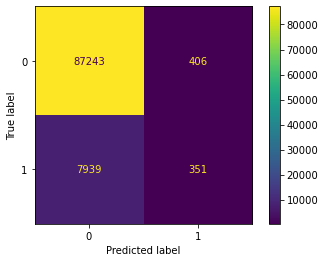

In [182]:
y_predict = model.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [183]:
#finding the most important features based for heart disease prediction

pd.DataFrame(zip(x_train.columns, np.transpose(model.coef_)), 
             columns=['features', 'coef']).sort_values(by=['coef'], key=abs, ascending=False)

,features,coef
5,Sex,[0.698773162466428]
1,Smoking,[0.4664645855106255]
8,Diabetic,[0.3600690060834371]
2,AlcoholDrinking,[-0.31743842069651584]
6,AgeCategory,[0.31239570972289016]
9,PhysicalActivity,[-0.18618159718492316]
0,BMI,[0.1401903889810005]
11,SleepTime,[-0.07049817216955755]
3,PhysicalHealth,[0.0673002464778622]
4,MentalHealth,[0.04392177234427894]


In [120]:
#Naive Bayes model prediction
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_test,y_test)

0.8533860056911162

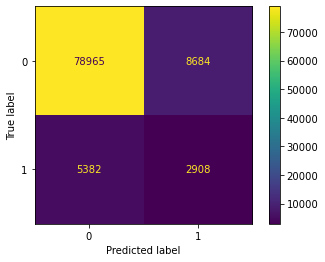

0.8533860056911162

In [184]:
#Naive Bayes confusion matrix
y_nbpred=nb.predict(x_test)
cmnb=confusion_matrix(y_test,y_nbpred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmnb, display_labels=nb.classes_)
disp.plot()
plt.show()
ac = accuracy_score(y_test,y_nbpred)
ac

Model accuracy score (criterion gini): 0.9136


[Text(334.8, 391.392, 'X[6] <= 7.5\ngini = 0.156\nsamples = 223856\nvalue = [204773, 19083]'),
 Text(167.4, 304.416, 'X[3] <= 7.25\ngini = 0.061\nsamples = 122685\nvalue = [118797, 3888]'),
 Text(83.7, 217.44, 'X[8] <= 1.5\ngini = 0.046\nsamples = 113713\nvalue = [111023, 2690]'),
 Text(41.85, 130.464, 'X[6] <= 5.5\ngini = 0.037\nsamples = 105494\nvalue = [103492, 2002]'),
 Text(20.925, 43.488, 'gini = 0.022\nsamples = 75547\nvalue = [74718, 829]'),
 Text(62.775000000000006, 43.488, 'gini = 0.075\nsamples = 29947\nvalue = [28774, 1173]'),
 Text(125.55000000000001, 130.464, 'X[6] <= 4.5\ngini = 0.153\nsamples = 8219\nvalue = [7531, 688]'),
 Text(104.625, 43.488, 'gini = 0.059\nsamples = 2641\nvalue = [2561, 80]'),
 Text(146.475, 43.488, 'gini = 0.194\nsamples = 5578\nvalue = [4970, 608]'),
 Text(251.10000000000002, 217.44, 'X[8] <= 1.5\ngini = 0.231\nsamples = 8972\nvalue = [7774, 1198]'),
 Text(209.25, 130.464, 'X[6] <= 3.5\ngini = 0.184\nsamples = 6964\nvalue = [6252, 712]'),
 Text(18

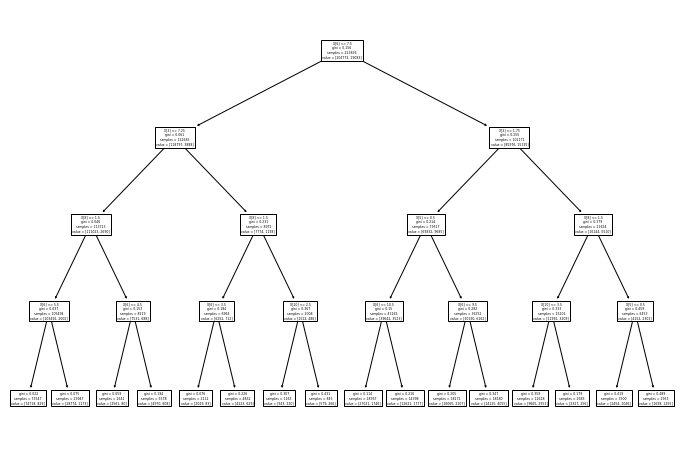

In [185]:
#Decision Tree Classification
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
tree_model=tree_model.fit(x_train,y_train)
prediction=tree_model.predict(x_test)

print('Model accuracy score (criterion gini): {0:0.4f}'. format(accuracy_score(y_test, prediction)))


plt.figure(figsize=(12,8))
tree.plot_tree(tree_model)

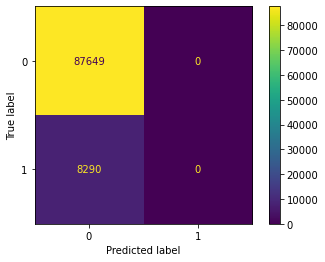

In [186]:
dtm=confusion_matrix(y_test,prediction)
disp=ConfusionMatrixDisplay(confusion_matrix=dtm, display_labels=tree_model.classes_)
disp.plot()
plt.show()

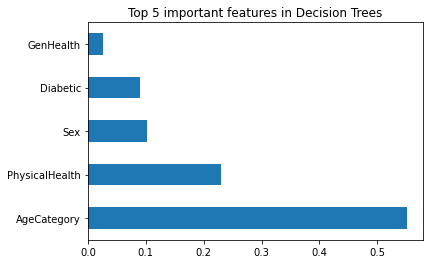

In [187]:
feat_importances_xd = pd.Series(np.abs(tree_model.feature_importances_), index=x.columns)
feat_importances_xd.nlargest(5).plot(kind='barh')
plt.title("Top 5 important features in Decision Trees")
plt.show()